
<img src="../../images/brownbear.png" width="400">

## A financial tool that can analyze and maximize investment portfolios on a risk adjusted basis  


Description: This notebook is useful for examining potfolios comprised of ETFs.  Construct portfolios from the ETFs and examine the results of different weighting schemes.


In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import brownbear as bb

# format price data
pd.options.display.float_format = '{:0.2f}'.format

# display all rows
pd.set_option('display.max_rows', None)

# do not truncate column names
pd.set_option('display.max_colwidth', None)

%matplotlib inline

In [3]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

### Some Globals

In [4]:
investment_universe = ['etf-galaxy']
risk_free_rate = 0
annual_returns = '3 Yr'
vola = 'Vola'
ds_vola = 'DS Vola'

In [5]:
# Fetch Investment Options - all values annualized
df = bb.fetch(investment_universe, risk_free_rate, annual_returns, vola, ds_vola)
df

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
0,SPY,S&P 500 ETF,US Stocks:Large Cap,10.17,-20.13,6.30,16.59,15.49,16.33,9.61,17.59,16.59,0.94
1,DIA,DJIA ETF,US Stocks:Large Cap,10.80,-17.45,1.13,10.91,13.02,12.22,7.70,17.95,10.91,0.61
2,QQQ,Nasdaq 100 ETF,US Stocks:Growth,-5.07,-35.19,-0.57,22.71,21.87,26.14,14.20,20.03,22.71,1.13
3,VTI,Vanguard Total Stock Market Index ETF,US Stocks:Total Stock Market,5.77,-22.16,1.93,15.53,14.77,17.32,10.17,18.24,15.53,0.85
4,IWM,Russell 2000 ETF,US Stocks:Small Cap,-16.34,-25.30,-11.30,9.11,9.43,20.54,11.88,23.37,9.11,0.39
5,MDY,S&P 400 Midcap ETF,US Stocks:Mid Cap,-14.81,-21.15,-3.41,11.25,10.58,17.15,10.45,21.78,11.25,0.52
6,IWD,Russell 1000 Value ETF,US Stocks:Value,24.90,-8.82,7.32,11.78,10.37,11.21,6.90,18.84,11.78,0.63
7,IWF,Russell 1000 Growth ETF,US Stocks,-1.41,-30.81,0.74,19.85,19.54,24.46,13.44,19.57,19.85,1.01
8,RSP,S&P 500 Equal Weight ETF,US Stocks,10.60,-14.75,6.00,14.55,13.33,13.85,7.80,20.18,14.55,0.72
9,SLY,S&P 600 Small Cap ETF,US Stocks:Small Cap,-24.71,-24.55,-3.85,11.26,10.95,18.31,10.58,23.58,11.26,0.48


In [6]:
# Rank
rank = bb.rank(df, rank_by='Sharpe Ratio', group_by='Asset Class', num_per_group=3)
rank_filtered = rank
rank_filtered = rank.loc[(rank['3 mo'] > 0) & rank['1 Yr'] > 0]
rank_filtered

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
21,XLV,S&P500 Healthcare Sector ETF,US Stocks:Healthcare,50.05,13.57,14.57,17.92,15.09,15.95,9.65,15.39,17.92,1.16
62,UUP,US Dollar ETF,Currencies:US Dollar,28.22,23.91,8.84,1.71,1.28,4.92,2.95,5.44,1.71,0.31
69,CYB,Chinese Yuan ETF,Currencies:Chinese Yuan,-4.37,0.45,-1.69,1.75,2.89,3.72,1.97,5.67,1.75,0.31
56,CORN,Corn ETF,Commodities:Corn,450.43,239.44,59.01,24.16,8.70,20.01,9.19,20.29,24.16,1.19
48,GLD,Gold ETF,Commodities:Gold,30.43,36.84,10.63,15.16,8.46,11.80,7.29,14.88,15.16,1.02
59,DBB,Base Metals ETF,Commodities:Base Metals,108.80,66.59,33.68,16.39,11.08,24.47,12.17,16.83,16.39,0.97


### Sample Portfolios
Format 'Investment option': weight

In [7]:
# put your "age" in bonds and the rest in stocks
age_portfolio = {
    'Title': 'Age Portfolio',
    'SPY': 0.50,
    'AGG': 0.50
}

# put your "age" in Short Term Treasuries and the rest in stocks
age2_portfolio = {
    'Title': 'Age2 Portfolio',
    'SPY': 0.50,
    'BIL': 0.50
}

# top dogs - top performer by sharpe ratio in each Asset Class, equal weights
top_dog_portfolio = {
    'Title': 'Top Dog Portfolio',
    'XLK': 1/7,
    'IYR': 1/7,
    'VPL': 1/7,
    'FXY': 1/7,
    'PALL': 1/7,
    'BIL': 1/7,
    'SHY': 1/7
}

# 50% S&P 500, 50% long term treasury
fifty_fifty_portfolio = {
    'Title': 'Fifty Fifty Portfolio',
    'SPY': 1/2,
    'TLT': 1/2
}

# 1/3 S&P 500, 1/3 bonds, 1/3 fixed income
thirds_portfolio = {
    'Title': 'Thirds Portfolio',
    'SPY': 1/3,
    'AGG': 1/3,
    'JPST': 1/3
}

# Dave Ramsey: 25% Growth and income, 25% Growth, 25% Aggressive growth, 25% International
dave_ramsey_portfolio = {
    'Title': 'Dave Ramsey Portfolio',
    'VTI': 1/4,
    'SPY': 1/4,
    'QQQ': 1/4,
    'VXUS': 1/4   
}

# Warren Buffett Retirement Fund: 90% S&P500, 10% Short Term Treasuries (sub General Account)
warren_buffett_portfolio = {
    'Title': 'Warren Buffet Portfolio',
    'SPY': 0.90,
    'BIL': 0.10
}

# https://www.forbes.com/sites/baldwin/2016/07/25/eight-famous-portfolios/#42c50d7d5cce
# american households: 25% real estate, 30% stocks, 30% fixed income, 5% cash, 10% alternatives
american_households_portfolio = {
    'Title': 'American Households Portfolio',
    'IYR': 0,
    'SPY': 0,
    'JPST': 0.43,
    'BIL': 0.51,
    'GLD': 0.06
}

# janet yellen: 50% fixed income, 40% S&P500, 10% cash
janet_yellen_portfolio = {
    'Title': 'Janet Yellen Portfolio',
    'JPST': 0.50,
    'SPY': 0.40,
    'BIL': 0.10
}

# risk off: 100% fixed income divided between risk free asset, bond fund, and money market 
risk_off_portfolio = {
    'Title': 'Risk Off Portfolio',
    'BIL': 1/3,
    'AGG': 1/3,
    'JPST': 1/3
}

# risk on: 100% US stocks bevided between large, emerging markets, and small cap
risk_on_portfolio = {
    'Title': 'Risk On Portfolio',
    'SPY': 1/3,
    'EEM':1/3,
}

# everything ranked
ranked_portfolio = {
    'Title': 'Ranked Portfolio'
}
everything = list(rank_filtered['Investment Option'])
ranked_portfolio.update(dict.fromkeys(everything, 1/len(everything)))

# top 10
top10_portfolio = {
    'Title': 'Ranked Portfolio'
}
top10 = list(rank_filtered['Investment Option'])[:10]
top10_portfolio.update(dict.fromkeys(top10, 1/len(top10)))

### Custom Portfolios

In [8]:
# my portfolio
my_portfolio = {
    'Title': 'My Portfolio',

}

### Choose Portfolio Option

In [9]:
# Select one of the portfolios from above
portfolio_option = ranked_portfolio

In [10]:
# Make a copy so that the original portfolio is preserved
portfolio_option = portfolio_option.copy()

### Analysis Options

In [11]:
# Specify the weighting scheme.  It will replace the weights specified in the portfolio
# You can also fix the weights on some Investent Options, Asset Classes, and Asset Subclasses
# while the others are automatically calculated.

# 'Equal' - will use equal weights.

# 'Sharpe Ratio' - will use proportionally weighted # allocations based on the percent
#  of an investment option's sharpe ratio to the sum of all the sharpe ratios in the portfolio.

# 'Std Dev' - will use standard deviation adjusted weights

# 'Annual Returns' - will use return adjusted weights

# 'Vola' - will use volatility adjusted weights

# 'DS Vola' - will use downside volatility adjusted weights

# None: 'Investment Option' means use user specified weights
#       'Asset Class' means do not group by Asset Class
#       'Asset Subclass means do not group by Asset Subclass 

weight_by = {
    'Asset Class':       {'weight_by': 'Annual Returns'},
    'Asset Subclass':    {'weight_by': 'Equal'},
    'Investment Option': {'weight_by': 'Std Dev'},
}
#weight_by = None

In [12]:
bb.DEBUG = False

# Analyze portfolio
annual_ret, std_dev, sharpe_ratio = \
    bb.analyze(df, portfolio_option, weight_by)

,XLV,UUP,CYB,CORN,GLD,DBB,Ranked Portfolio
Annual Returns,17.92,1.71,1.75,24.16,15.16,16.39,16.77
Std Dev,15.39,5.44,5.67,20.29,14.88,16.83,9.53
Sharpe Ratio,1.16,0.31,0.31,1.19,1.02,0.97,1.76
Weight,0.38,0.05,0.05,0.18,0.18,0.18,1.00
Worst Typical Down Year,-12.86,-9.17,-9.59,-16.42,-14.60,-17.27,-2.29
Black Swan,-28.25,-14.61,-15.26,-36.71,-29.48,-34.10,-11.81


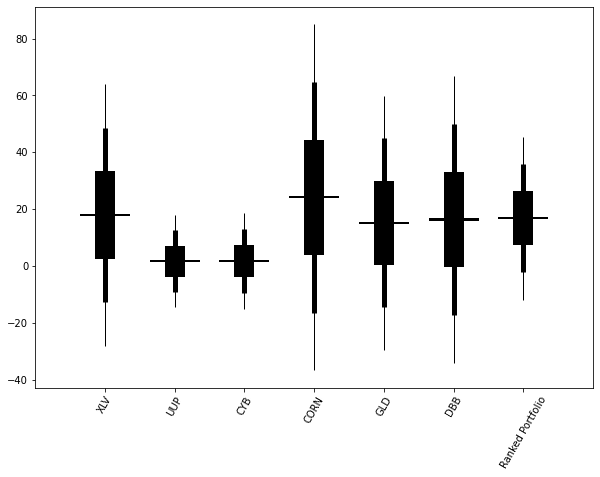

In [13]:
# Display Results
summary = bb.summary(df, portfolio_option, annual_ret, std_dev, sharpe_ratio)
summary

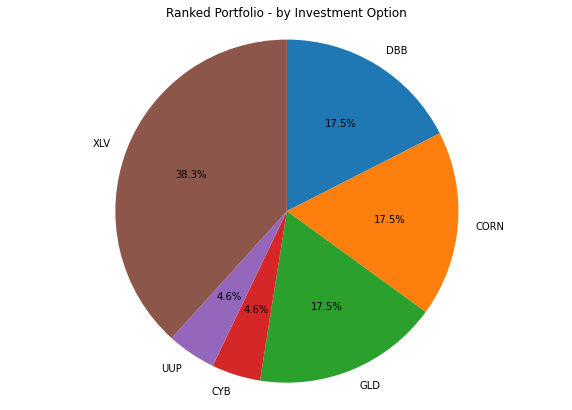

DBB    0.18
CORN   0.18
GLD    0.18
CYB    0.05
UUP    0.05
XLV    0.38



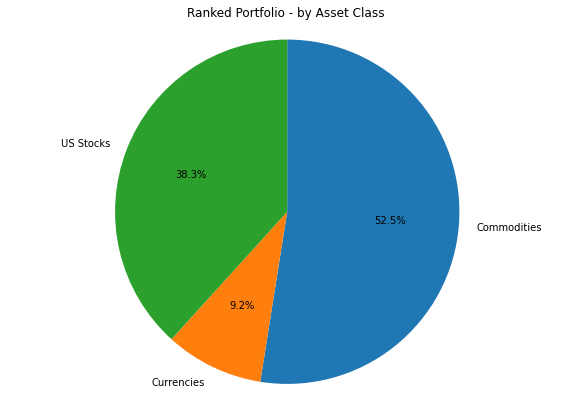

Commodities   0.53
Currencies    0.09
US Stocks     0.38



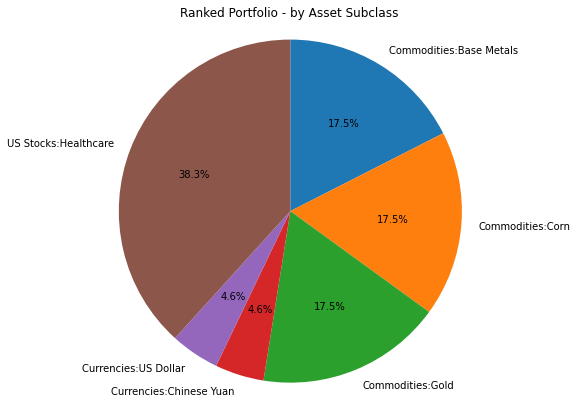

Commodities:Base Metals   0.18
Commodities:Corn          0.18
Commodities:Gold          0.18
Currencies:Chinese Yuan   0.05
Currencies:US Dollar      0.05
US Stocks:Healthcare      0.38



In [14]:
# Show pie charts of investment and asset class weights
bb.show_pie_charts(df, portfolio_option, charts=['Investment Option', 'Asset Class', 'Asset Subclass'])

In [15]:
# Show exact weights
bb.print_portfolio(portfolio_option)

Ranked Portfolio Weights:
    XLV                            0.3827
    UUP                            0.0461
    CYB                            0.0461
    CORN                           0.1750
    GLD                            0.1750
    DBB                            0.1750


### Optimize Portfolio

In [16]:
# Run_portfolio_optimizer = True will run portfolio optimizer after portfolio analysis is complete
run_portfolio_optimizer = True

In [17]:
# Optimize sharpe ratio while specifying Annual Rate, Worst Typical Down Year,
# and Black Swan.  Setting a constraint to None optimizes absolute Sharpe Ratio
# without regard to that constraint.

'''
constraints = {
    'Annual Return': 12,
    'Worst Typical Down Year': -5,
    'Black Swan': None
}
'''

constraints = {
    'Annual Return': 8,
    'Worst Typical Down Year': None,
    'Black Swan': -40
}

if run_portfolio_optimizer:
    bb.optimizer(df, portfolio_option, constraints)

Running optimizer...................

Ranked Portfolio Metrics:           
    max_sharpe_ratio            1.80
    annual_return              18.47
    std_dev                    10.24
    worst typical down year    -2.01
    black_swan                -12.26


Ranked Portfolio Weights:
    XLV                            0.3500
    UUP                            0.0000
    CYB                            0.0000
    CORN                           0.2400
    GLD                            0.2600
    DBB                            0.1500



### Use Sharpe Ratio adjusted weights
Recommend that you also try using Sharpe Ratio adjusted weights and compare those results with the Optimized Portflio.  
It tends to produce a higher Annual Return while keeping the allocations more balanced than the Optimizer.  (See 'Analysis Options' section).